In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf

In [3]:
df=pd.read_csv("housingdata.csv")
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2


In [4]:
df.isnull().sum()

CRIM       20
ZN         20
INDUS      20
CHAS       20
NOX         0
RM          0
AGE        20
DIS         0
RAD         0
TAX         0
PTRATIO     0
B           0
LSTAT      20
MEDV        0
dtype: int64

In [6]:
df.mean()

CRIM         3.611874
ZN          11.211934
INDUS       11.083992
CHAS         0.069959
NOX          0.554695
RM           6.284634
AGE         68.518519
DIS          3.795043
RAD          9.549407
TAX        408.237154
PTRATIO     18.455534
B          356.674032
LSTAT       12.715432
MEDV        22.532806
dtype: float64

In [12]:
df.fillna(df.mean(),inplace=True)

In [21]:
x = df.drop('MEDV',axis=1)
y=df['MEDV']

In [63]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3)
scale = MinMaxScaler()
x_train_scaled = scale.fit_transform(x_train)
x_test_scaled = scale.fit_transform(x_test)
print("shape of scaled x train:",x_train_scaled.shape)
print("shape of scaled x test:",x_test_scaled.shape)

shape of scaled x train: (354, 13)
shape of scaled x test: (152, 13)


In [74]:
x_train_scaled[0]

array([0.00154995, 0.        , 0.28962963, 0.        , 0.27777778,
       0.56936665, 0.70442842, 0.15699879, 0.17391304, 0.3759542 ,
       0.88297872, 0.99665297, 0.16851064])

In [65]:
x_train_scaled[0].shape

(13,)

## Sequential Model:
A Sequential model is appropriate for a plain stack of layers where each layer has exactly one input tensor and one output tensor.
It's a linear stack of layers that can be easily defined and understood.
It's suitable for a feedforward neural network where the data flows in one direction, from the input layer through the hidden layers to the output layer.

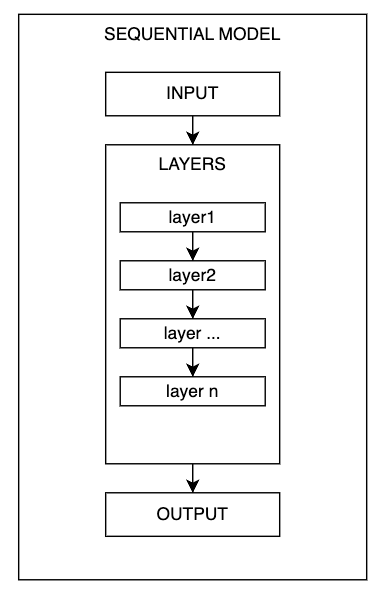

## Dense Layer:
A Dense layer is a fully connected layer, where each neuron in one layer is connected to every neuron in the next layer.
It is one of the basic building blocks of a neural network.
The number of neurons in a dense layer is specified by the units parameter.
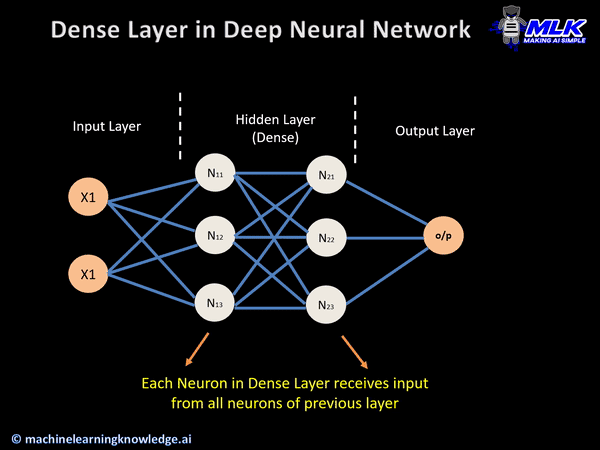

## Activation Function (ReLU):
The activation parameter in the Dense layers specifies the activation function applied to the output of each neuron.
In this case, the Rectified Linear Unit (ReLU) activation function is used. ReLU introduces non-linearity to the model.
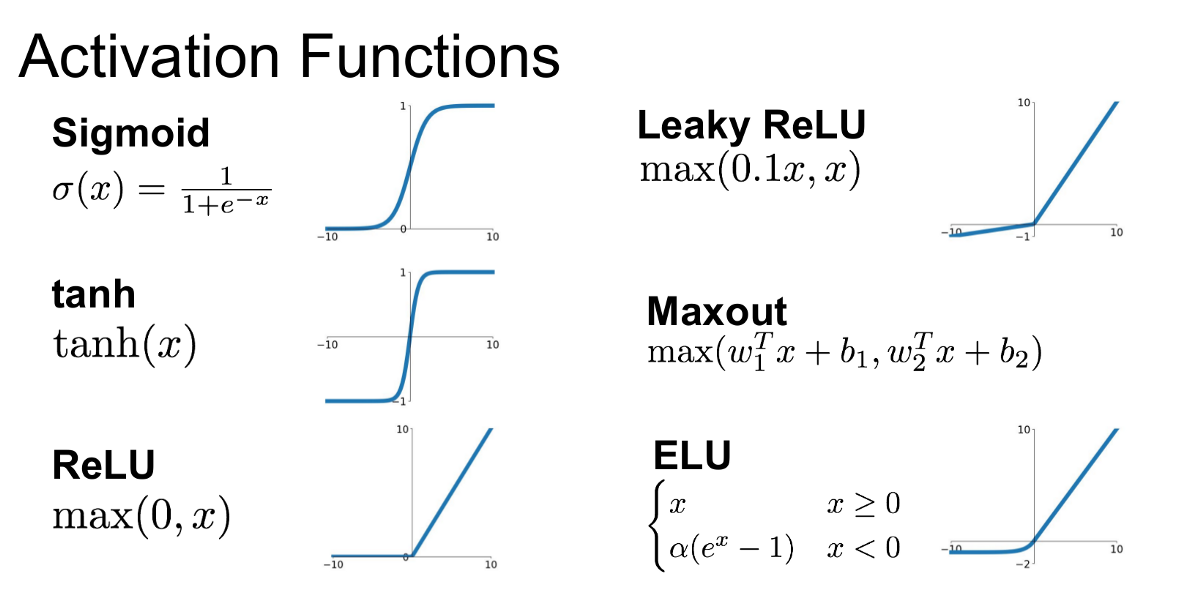

## Adam Optimizer:
The Adam optimizer is an optimization algorithm commonly used for training neural networks.
It adapts the learning rates of individual parameters and is well-suited for a wide range of problems.The Adam optimizer is a popular optimization algorithm used for training deep neural networks. It is an extension of the stochastic gradient descent (SGD) algorithm that combines ideas from two other optimization algorithms: RMSprop (Root Mean Square Propagation) and Momentum.
performance visualization of  different optimizers


## Input Shape:
The input_shape parameter in the first Dense layer specifies the shape of the input data. It should match the shape of the input features.
It is important to set the input shape for the first layer so that the model knows what to expect as input.


## Loss Function (Mean Squared Error - MSE):
The loss parameter in the compile method specifies the loss function to be minimized during training.
Mean Squared Error (MSE) is a common loss function for regression problems. It measures the average squared difference between the predicted values and the actual values.

## Metrics (Mean Absolute Error - MAE):
The metrics parameter in the compile method specifies the metrics to be monitored during training.
Mean Absolute Error (MAE) is a metric that measures the average absolute difference between the predicted values and the actual 

In [72]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *

def house_price_prediction():
    model=Sequential()
    model.add(Dense(128,activation='relu',input_shape=(x_train_scaled[0].shape)))
    model.add(Dense(64,activation='relu'))
    model.add(Dense(32,activation='relu'))
    model.add(Dense(1))
    opt = tf.keras.optimizers.Adam()
    model.compile(optimizer=opt,loss='mse',metrics=['mae'])
    return model

In [73]:
model= house_price_prediction()
history=model.fit(x=x_train_scaled,y=y_train,batch_size=1,verbose=1,epochs=100,validation_data=(x_test_scaled,y_test))

Epoch 1/100
354/354 [==============================] - 1s 2ms/step - loss: 149.9571 - mae: 9.0361 - val_loss: 33.7545 - val_mae: 4.2953
Epoch 2/100
354/354 [==============================] - 1s 2ms/step - loss: 39.7098 - mae: 4.2944 - val_loss: 20.9255 - val_mae: 3.5586
Epoch 3/100
354/354 [==============================] - 1s 2ms/step - loss: 29.5589 - mae: 3.7166 - val_loss: 22.9882 - val_mae: 3.8018
Epoch 4/100
354/354 [==============================] - 1s 2ms/step - loss: 27.5428 - mae: 3.5448 - val_loss: 27.5698 - val_mae: 4.3809
Epoch 5/100
354/354 [==============================] - 1s 2ms/step - loss: 24.9696 - mae: 3.4411 - val_loss: 28.6430 - val_mae: 4.6717
Epoch 6/100
354/354 [==============================] - 1s 2ms/step - loss: 24.5522 - mae: 3.3308 - val_loss: 29.9711 - val_mae: 4.7342
Epoch 7/100
354/354 [==============================] - 1s 2ms/step - loss: 24.5587 - mae: 3.1641 - val_loss: 19.6335 - val_mae: 3.6213
Epoch 8/100
354/354 [==============================] -

354/354 [==============================] - 1s 2ms/step - loss: 7.1975 - mae: 1.9606 - val_loss: 22.6444 - val_mae: 3.8520
Epoch 62/100
354/354 [==============================] - 1s 2ms/step - loss: 6.3912 - mae: 1.8277 - val_loss: 37.1165 - val_mae: 5.2251
Epoch 63/100
354/354 [==============================] - 1s 2ms/step - loss: 6.4019 - mae: 1.9059 - val_loss: 13.8751 - val_mae: 3.0246
Epoch 64/100
354/354 [==============================] - 1s 2ms/step - loss: 5.9436 - mae: 1.8842 - val_loss: 23.4002 - val_mae: 3.7619
Epoch 65/100
354/354 [==============================] - 1s 2ms/step - loss: 6.9676 - mae: 1.9500 - val_loss: 26.0334 - val_mae: 4.3029
Epoch 66/100
354/354 [==============================] - 1s 2ms/step - loss: 6.2203 - mae: 1.8222 - val_loss: 20.7388 - val_mae: 3.5123
Epoch 67/100
354/354 [==============================] - 1s 2ms/step - loss: 5.3334 - mae: 1.7606 - val_loss: 24.6836 - val_mae: 4.1000
Epoch 68/100
354/354 [==============================] - 1s 3ms/step 

In [76]:
test_input = [[0.00154995, 0.        , 0.28962963, 0.        , 0.27777778,
       0.56936665, 0.70442842, 0.15699879, 0.17391304, 0.3759542 ,
       0.88297872, 0.99665297, 0.16851064]]
print("actual output:",24.0)
print("predicted output:",model.predict(test_input))

actual output: 24.0
1/1 [==============================] - 1s 815ms/step
predicted output: [[23.954567]]
